# Análisis exploratorio (StudentsPerformance)

In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import matplotlib.gridspec as gridspec # Graficos con disposicion compleja
from statsmodels.graphics.mosaicplot import mosaic # Gráfico de mosaico

In [2]:
# Estilo general de los graficos
sns.set_style("whitegrid", {'axes.grid' : False})

In [3]:
# Establecimiento del directorio con los datos
os.chdir(r'C:\Users\noe2g\Documents\empleo\foodology\datos')

In [4]:
# Carga de los datos
df = pd.read_csv('StudentsPerformance.csv')

## Descripción del conjunto de datos
El conjunto de datos consta de 8 variables y 1000 observaciones correspondientes con estudiantes estadounidenses cuyo desempeño académico fue evaluado en tres asignaturas: Matemáticas, Lectura y Escritura.

Las variables son las siguientes:

- **gender**: Género de los alumnos.
- **race/ethnicity**: Etnia de los alumnos.
- **parental level of education**: Nivel educativo de los padres de los alumnos.
- **lunch**: Tipo de almuerzo que consumieron los alumnos.
- **test preparation course**: Variable sobre si los alumnos tomaron un curso de preparación para el examen o no.
- **math score**: Puntaje de los alumnos en la prueba de matemáticas.
- **reading score**: Puntaje de los alumnos en la prueba de lectura.
- **writing score**: Puntaje de los alumnos en la prueba de escritura.

Escala de medición de las variables:

| Variable | Tipo | Escala |
| :----:   |:----:| :----: |
| gender | Categórica | Nominal |
| race/ethnicity | Categórica | Nominal |
| parental level of education | Categórica | Ordinal |
| lunch | Categórica | Nominal |
| test preparation course | Categórica | Nominal |
| math score | Cuantitativa | Intervalo |
| reading score | Cuantitativa | Intervalo |
| writing score | Cuantitativa | Intervalo |


In [5]:
df.shape

(1000, 8)

In [6]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Valores ausentes
El conjunto de datos no presenta valores ausentes en alguna de las 8 variables, por lo que **no es necesario realizar algún tratamiento**. Esto se corrobora con el conteo de valores no nulos y con las categorías distintas de cada variable.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
cat = df.columns[0:5]
cat

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [9]:
print('Valores únicos - variables categóricas\n')
for c in cat:
    print(f'{c}:'.capitalize())
    for i in df[c].unique():
        print(f'-{i}')
    print('____\n')

Valores únicos - variables categóricas

Gender:
-female
-male
____

Race/ethnicity:
-group B
-group C
-group A
-group D
-group E
____

Parental level of education:
-bachelor's degree
-some college
-master's degree
-associate's degree
-high school
-some high school
____

Lunch:
-standard
-free/reduced
____

Test preparation course:
-none
-completed
____



## Exploración de los datos
- Se contó con información de 518 mujeres y 482 hombres.
- De estos estudiantes, 89 correspondieron al Grupo A, 190 al B, 319 al C, 262 al D y 140 al Grupo E.
- Considerando el nivel educativo de los padres de los estudiantes, 179 contaban con secundaria trunca, 196 con secundaria, 222 con grado técnico, 226 con universidad trunca, 118 con título universitario y 59 con maestría.
- Hubo 642 estudiantes que no tomaron curso de preparación para el examen y 358 que presentaron uno completo.
- Finalmente, en cuanto al tipo de lunch, se tuvieron 355 de tipo Gratis/Reducido y 645 de tipo Estándar.

Como se puede observar, algunas de las variables tienen proporciones de ocurrencia de sus categorías que son muy diversas. Podría ser necesario aplicar técnicas de balanceo de datos para usar algunos algoritmos.

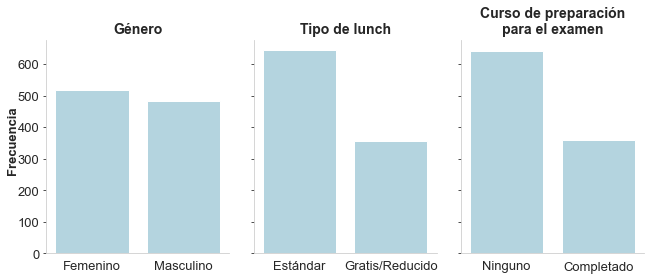

In [10]:
cat_1 = ['gender', 'lunch', 'test preparation course']
rows = 1
cols = 3
color = 'lightblue'
cat_labs1 = ['Género', 'Tipo de lunch', 'Curso de preparación\npara el examen']
cat_ylabs1 = [['Femenino', 'Masculino'],
              ['Estándar', 'Gratis/Reducido'],
              ['Ninguno', 'Completado']]

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(9,4), sharey=True)

# Creacion de cada subplot
for c in range(cols):
    g = sns.countplot(x=df.loc[:, cat_1[c]], ax=ax[c], color=color)
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(cat_labs1[c],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.set_xticklabels(cat_ylabs1[c])
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.01,0.5, "Frecuencia", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/barras_gender_lunch_course.png', dpi=300)

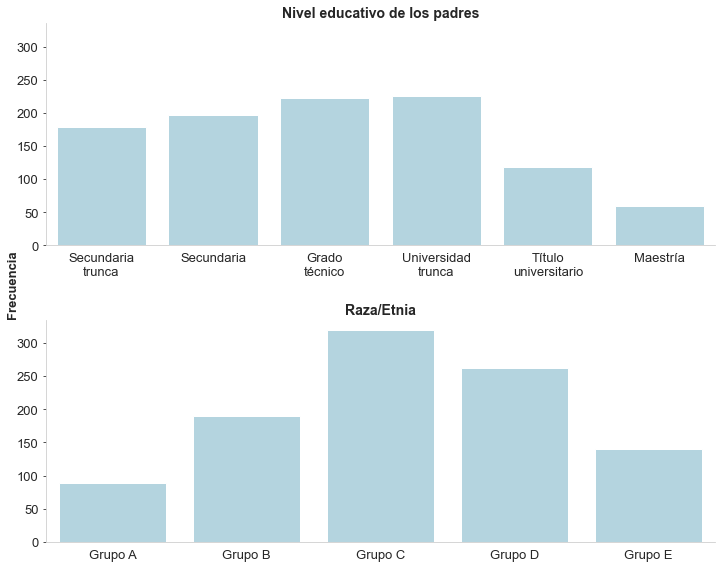

In [11]:
cat_2 = ['parental level of education', 'race/ethnicity']
rows = 2
cols = 1
color = 'lightblue'

cat_labs2 = ['Nivel educativo de los padres', 'Raza/Etnia']
order_ylabs2 = [["some high school", "high school", "associate's degree", 
                 "some college", "bachelor's degree", "master's degree",],
                ['group A', 'group B', 'group C', 'group D', 'group E']]
cat_ylabs2 = [['Secundaria\ntrunca', 'Secundaria', 'Grado\ntécnico',
               'Universidad\ntrunca\n', 'Título\nuniversitario', 'Maestría'],
              ['Grupo A', 'Grupo B', 'Grupo C', 'Grupo D', 'Grupo E']]

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(10,8), sharey=True)

# Creacion de cada subplot
for r in range(rows):
    g = sns.countplot(x=df.loc[:, cat_2[r]], ax=ax[r], color=color, order=order_ylabs2[r])
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(cat_labs2[r],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.set_xticklabels(cat_ylabs2[r])
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.01,0.5, "Frecuencia", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/barras_parentsed_race.png', dpi=300)

In [12]:
print('Conteo de categorías\n')
for c in cat:
    print(f'{c}:'.capitalize())
    print(df[c].value_counts())
    print('____\n')

Conteo de categorías

Gender:
female    518
male      482
Name: gender, dtype: int64
____

Race/ethnicity:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
____

Parental level of education:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
____

Lunch:
standard        645
free/reduced    355
Name: lunch, dtype: int64
____

Test preparation course:
none         642
completed    358
Name: test preparation course, dtype: int64
____



Al examinar algunos de los cruces entre variables categóricas que podrían tener relación entre ellas, no se observaron patrones de interés.

In [13]:
pd.crosstab(df['lunch'], df['test preparation course'])

test preparation course,completed,none
lunch,,
free/reduced,131,224
standard,227,418


In [14]:
pd.crosstab(df['race/ethnicity'], df['lunch'])

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


In [15]:
pd.crosstab(df['race/ethnicity'], df['parental level of education'])

parental level of education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race/ethnicity,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


Al examinar los puntajes para cada una de las tres áreas evaluadas, se puede observar que se presentaron distribuciones similares, todas con sesgo negativo (a la izquierda). Los puntajes de las tres asignaturas mostraron rangos intercuartílicos similares y Matemáticas presentó una mediana (M=66, IQR=20) ligeramente menor que Lectura (M=70, IQR=20) y Escritura (M=69, IQR=21.25).

Los puntajes de las tres asignaturas mostraron valores atípicos bajos. Matemáticas mostró los valores atípicos más extremos, seguida de Escritura y finalizando con Lectura.

A partir de todo esto, se podría hipotetizar que Matemáticas es la materia que se dificultó más para los estudiantes evaluados.

In [16]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [17]:
v_num = list(df.columns[5:])
for n in v_num:
    print(f'{n}:'.capitalize())
    q1 = int(df[n].quantile([0.25]))
    q3 = int(df[n].quantile([0.75]))
    print(f'q1: {q1}\nq3: {q3}\niqr:{q3-q1}')
    print('____\n')

Math score:
q1: 57
q3: 77
iqr:20
____

Reading score:
q1: 59
q3: 79
iqr:20
____

Writing score:
q1: 57
q3: 79
iqr:22
____



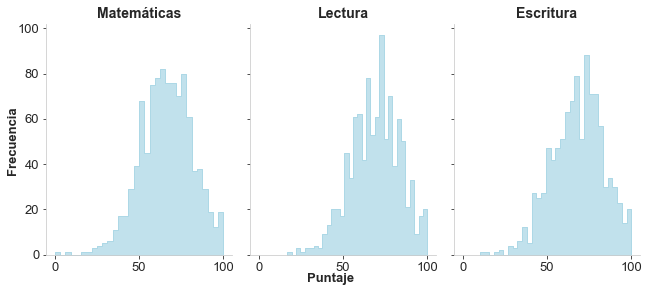

In [18]:
#v_num = list(df.columns[5:])
rows = 1
cols = 3
color = 'lightblue'
n_bins = round(math.sqrt(df.shape[0]))
num_labs = ['Matemáticas', 'Lectura', 'Escritura']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(9,4), sharey=True, sharex=True)

# Creacion de cada subplot
for c in range(cols):
    g = sns.histplot(x=df.loc[:, v_num[c]], ax=ax[c], bins=n_bins, color=color, element='step')
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[c],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True, bottom=True)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.01,0.5, "Frecuencia", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

# Etiqueta del eje x
fig.text(0.5,0.02, "Puntaje", ha="center", va="center", fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/histogramas.png', dpi=300)

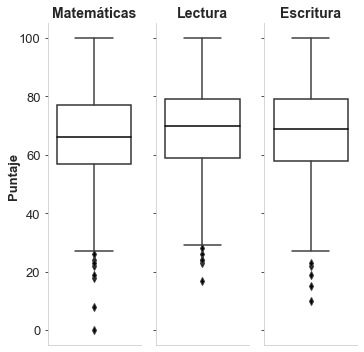

In [19]:
#v_num = list(df.columns[5:])
rows = 1
cols = 3
color = 'white'
#num_labs = ['Matemáticas', 'Lectura', 'Escritura']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(5,5), sharey=True)

# Creacion de cada subplot
for c in range(cols):
    g = sns.boxplot(y=df.loc[:, v_num[c]], ax=ax[c],
                    medianprops=dict(color="black", alpha=1),
                    flierprops=dict(markerfacecolor='black', marker='d'),
                    boxprops=dict(facecolor=color, edgecolor='black', alpha=0.8))
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[c],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.015,0.5, "Puntaje", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/boxplots_puntajes.png', dpi=300)

En cada asignatura más del 50% de los estudiantes presentó una calificación aprobatoria (mayor o igual a 60). Matemáticas fue la que mostró el menor porcentaje de estudiantes con calificación superior a 60 (67.7%). La materia que presentó el mayor número de estudiantes aprobados fue Lectura, con un 74.6%.

In [20]:
#v_num = list(df.columns[5:])
print('Porcentaje de alumnos con puntaje mayor o igual a 60')
for n in v_num:
    x = df[df[n] >= 60].shape[0]/10
    print(f'{n}: {x}%'.capitalize())
    print('____\n')

Porcentaje de alumnos con puntaje mayor o igual a 60
Math score: 67.7%
____

Reading score: 74.6%
____

Writing score: 71.9%
____



Con respecto a las relaciones entre los puntajes, entre Matemáticas y Lectura se obtuvo un coeficiente de correlación de Pearson de 0.82, entre Matemáticas y Escritura el valor fue de 0.8 y para Escritura y Lectura fue de 0.95. Con lo anterior, se afirma que los cruces entre los tres puntajes mostraron correlaciones altas y una relación directa.

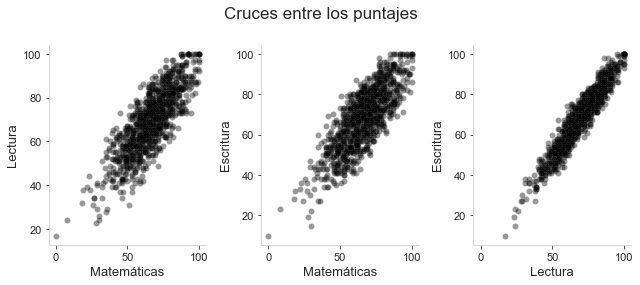

In [21]:
score_pairs = [['math score', 'reading score'],
               ['math score', 'writing score'],
               ['reading score', 'writing score']]
score_labs = [['Matemáticas', 'Lectura'],
              ['Matemáticas', 'Escritura'],
              ['Lectura', 'Escritura']]
rows = 1
cols = 3
color = 'black'
labs_size = 13

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(9,4), sharex=True)
fig.suptitle("Cruces entre los puntajes", fontsize=17)

# Creacion de cada subplot
for c in range(cols):
    g = sns.scatterplot(x=df[score_pairs[c][0]], y=df[score_pairs[c][1]], ax=ax[c], color=color, alpha=0.4, linewidth=0.1)
    g.axes.set_title('\n',fontdict={'fontsize':14, 'fontweight':'bold'})
    g.set_xlabel(score_labs[c][0], fontsize=labs_size)
    g.set_ylabel(ylabel=score_labs[c][1], fontsize=labs_size)
    g.tick_params(labelsize=11, left=True, bottom=True)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

plt.tight_layout()
plt.show()

# Guardar el gráfico
fig.savefig('../figuras/dispersion_puntajes.png', dpi=300)

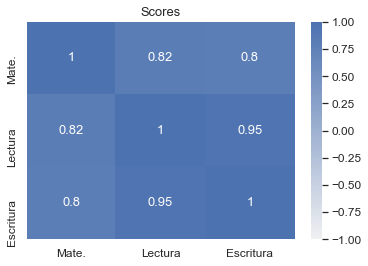

In [22]:
num_labs2 = ['Mate.', 'Lectura', 'Escritura']
font_size = 13
# Cambiar la escala de la fuente
sns.set(font_scale=1.08)

fig, ax = plt.subplots(figsize=(6,4))
g = sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap=sns.color_palette("light:b", as_cmap=True))

ax.set_title('Scores')
g.set_xticklabels(num_labs2)
g.set_yticklabels(num_labs2)
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/heatmap_puntajes.png', dpi=300)

# Restaurar la escala de la fuente
sns.set(font_scale=1)

# Estilo general de los graficos
sns.set_style("whitegrid", {'axes.grid' : False})

Al revisar los puntajes **agrupando los valores por género**, se observaron diferencias entre hombres y mujeres. En Matemáticas la mediana fue mayor para los hombres, mientras que para Lectura y Escritura fue mayor para mujeres. Además, las mujeres presentaron un mayor número de valores atípicos en los tres puntajes.

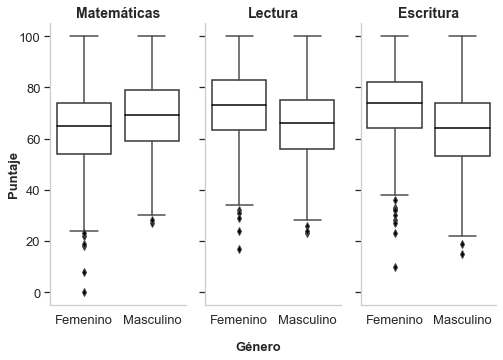

In [23]:
#v_num = list(df.columns[5:])
rows = 1
cols = 3
color = 'white'
#num_labs = ['Matemáticas', 'Lectura', 'Escritura']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(7,5), sharey=True)

# Creacion de cada subplot
for c in range(cols):
    g = sns.boxplot(x=df['gender'], y=df.loc[:, v_num[c]], ax=ax[c], 
                    medianprops=dict(color="black", alpha=1),
                    flierprops=dict(markerfacecolor='black', marker='d'),
                    boxprops=dict(facecolor=color, edgecolor='black', alpha=0.8))
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[c],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.set_xticklabels(['Femenino\n', 'Masculino'])
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.015,0.5, "Puntaje", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

# Etiqueta del eje x
fig.text(0.5,0.018, "Género", ha="center", va="center", fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/boxplots_puntajesXgenero.png', dpi=300)

**Agrupando con la variable Tipo de lunch**, se observó que para las tres materias existió una mediana más alta de puntaje relacionada con lunch Estándar que con Gratis/Reducido.

Lo anterior podría deberse a que el lunch Estándar sea de mayor calidad y que esté relacionado con un mejor desempeño. Otra posibilidad es que el consumo del lunch Gratis/Reducido esté relacionado con un nivel socioeconómico más bajo y que esto, a su vez, se relacione con un menor desempeño en las áreas de evaluación.

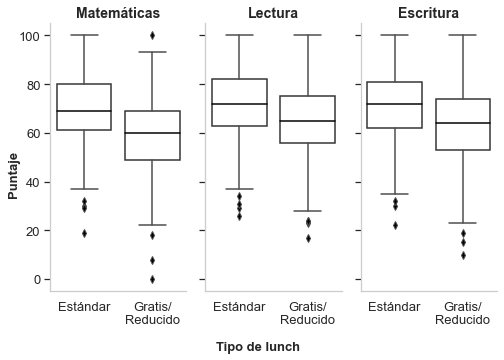

In [24]:
#v_num = list(df.columns[5:])
rows = 1
cols = 3
color = 'white'
#num_labs = ['Matemáticas', 'Lectura', 'Escritura']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(7,5), sharey=True)

# Creacion de cada subplot
for c in range(cols):
    g = sns.boxplot(x=df['lunch'], y=df.loc[:, v_num[c]], ax=ax[c], 
                    medianprops=dict(color="black", alpha=1),
                    flierprops=dict(markerfacecolor='black', marker='d'),
                    boxprops=dict(facecolor=color, edgecolor='black', alpha=0.8))
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[c],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)
    #g.set_xticklabels(g.get_xticklabels(),rotation=30)
    g.set_xticklabels(['Estándar', 'Gratis/\nReducido\n'])

# Etiqueta del eje y
fig.text(0.015,0.5, "Puntaje", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

# Etiqueta del eje x
fig.text(0.5,0.018, "Tipo de lunch", ha="center", va="center", fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/boxplots_puntajesXlunch.png', dpi=300)

Considerando la variable **Curso de preparación para el examen**, se observó que las medianas de puntajes para las tres materias fueron mayores para quienes tomaron uno completo que para quienes no tomaron cursos. Además, hubo un mayor número de valores atípicos para el grupo que no tomó cursos de preparación.

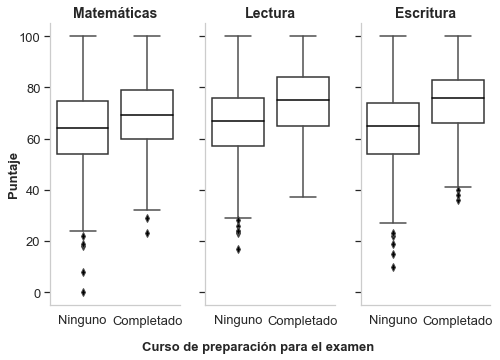

In [25]:
#v_num = list(df.columns[5:])
rows = 1
cols = 3
color = 'white'
#num_labs = ['Matemáticas', 'Lectura', 'Escritura']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(7,5), sharey=True)

# Creacion de cada subplot
for c in range(cols):
    g = sns.boxplot(x=df['test preparation course'], y=df.loc[:, v_num[c]], ax=ax[c], 
                    medianprops=dict(color="black", alpha=1),
                    flierprops=dict(markerfacecolor='black', marker='d'),
                    boxprops=dict(facecolor=color, edgecolor='black', alpha=0.8))
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[c],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.set_xticklabels(['Ninguno\n', 'Completado'])
    g.tick_params(labelsize=13, left=True)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.015,0.5, "Puntaje", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

# Etiqueta del eje x
fig.text(0.5,0.018, "Curso de preparación para el examen", ha="center", va="center", fontdict={'fontsize':13, 'fontweight':'bold'})


plt.tight_layout()
plt.show()

# Guardar el gráfico
fig.savefig('../figuras/boxplots_puntajesXcourse.png', dpi=300)

Al revisar el **Nivel educativo de los padres**, de manera general, parece haber existido una ligera relación con los puntajes en las asignaturas evaluadas, obteniéndose los menores valores de mediana cuando los padres tenían Secundaria trunca o Secundaria terminada y los mayores cuando los padres contaban con un título universitario o con maestría.

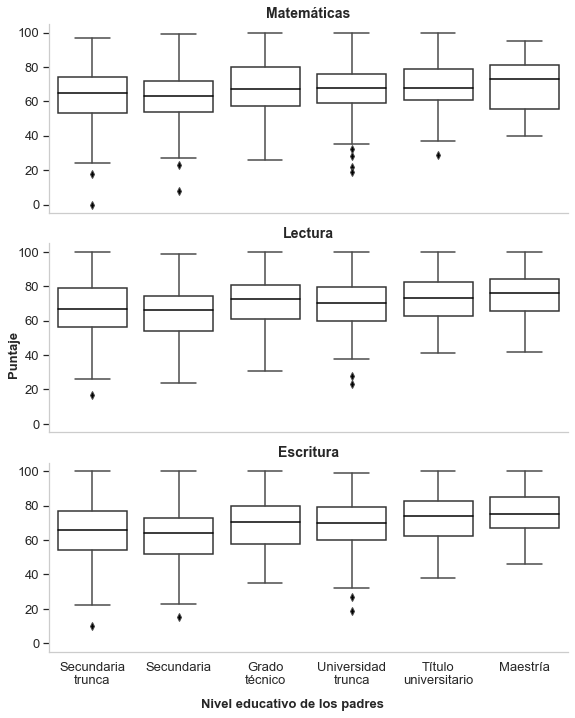

In [26]:
#v_num = list(df.columns[5:])
rows = 3
cols = 1
color = 'white'
#num_labs = ['Matemáticas', 'Lectura', 'Escritura']
x_labs = ['Secundaria\ntrunca', 'Secundaria', 'Grado\ntécnico',
          'Universidad\ntrunca\n', 'Título\nuniversitario', 'Maestría']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8,10), sharex=True, sharey=True)

# Creacion de cada subplot
for r in range(rows):
    g = sns.boxplot(x=df['parental level of education'], y=df.loc[:, v_num[r]], ax=ax[r],
                    order=["some high school", "high school", "associate's degree", 
                           "some college", "bachelor's degree", "master's degree",],
                    medianprops=dict(color="black", alpha=1),
                    flierprops=dict(markerfacecolor='black', marker='d'),
                    boxprops=dict(facecolor=color, edgecolor='black', alpha=0.8))
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[r],fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.set_xticklabels(x_labs)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.015,0.5, "Puntaje", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

# Etiqueta del eje x
fig.text(0.5,0.013, "Nivel educativo de los padres", ha="center", va="center", fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
#fig.savefig('../figuras/boxplots_puntajesXparentsed.png', dpi=300)

**Agrupando con base en la variable de Raza/Etnia**, se observó que, de forma general, el Grupo A mostró el menor desempeño en las tres pruebas, seguido del Grupo B, el C, el D y el E, siendo este último el que presentó una mediana más alta en las tres asignatiuras.

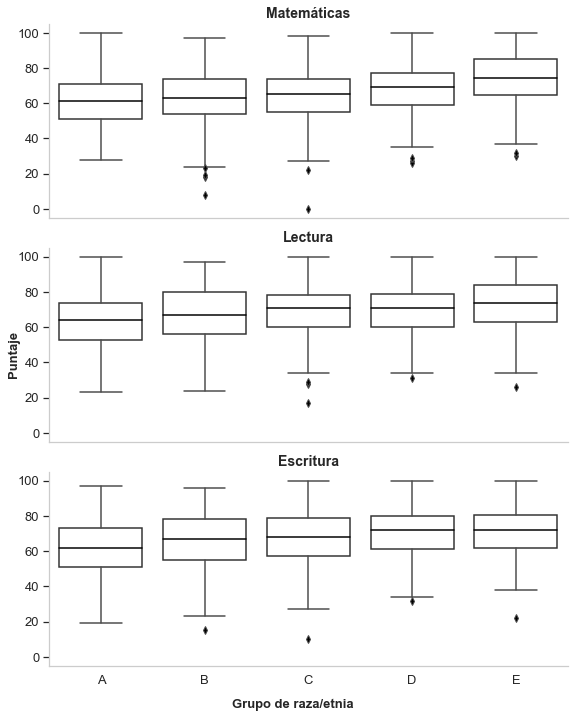

In [27]:
#v_num = list(df.columns[5:])
rows = 3
cols = 1
color = 'white'
#num_labs = ['Matemáticas', 'Lectura', 'Escritura']
x_labs = ['A\n', 'B', 'C', 'D', 'E']

fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize=(8,10), sharey=True, sharex=True)

# Creacion de cada subplot
for r in range(rows):
    g = sns.boxplot(x=df['race/ethnicity'], y=df.loc[:, v_num[r]], ax=ax[r],
                    order=['group A', 'group B', 'group C', 'group D', 'group E'],
                    medianprops=dict(color="black", alpha=1),
                    flierprops=dict(markerfacecolor='black', marker='d'),
                    boxprops=dict(facecolor=color, edgecolor='black', alpha=0.8))
    g.set(ylabel=None, xlabel=None)
    g.axes.set_title(num_labs[r].capitalize(),fontdict={'fontsize':14, 'fontweight':'bold'})
    g.tick_params(labelsize=13, left=True)
    g.set_xticklabels(x_labs)
    g.spines['right'].set_visible(False)
    g.spines['top'].set_visible(False)

# Etiqueta del eje y
fig.text(0.015,0.5, "Puntaje", ha="center", va="center", rotation=90, fontdict={'fontsize':13, 'fontweight':'bold'})

# Etiqueta del eje x
fig.text(0.5,0.013, "Grupo de raza/etnia", ha="center", va="center", fontdict={'fontsize':13, 'fontweight':'bold'})

plt.tight_layout()
plt.show()

# Guardar el gráfico
fig.savefig('../figuras/boxplots_puntajesXrace.png', dpi=300)

## Conclusiones
- Algunas de las variables tienen proporciones de ocurrencia de sus categorías que son muy diversas. Podría ser necesario aplicar técnicas de balanceo de datos para usar algunos algoritmos.
- Fue observado que las tres áreas evaluadas presentaron distribuciones muy similares y una correlación alta, mostrando una relación positiva.
- Matemáticas pareció ser la materia más difícil para los estudiantes, mostrando el mayor número de valores atípicos bajos, la mediana más baja y el porcentaje de alumnos aprobados más bajo.
- De manera general, se observaron ligeras diferencias al agrupar por **Género**, encontrando puntajes ligeramente más altos en Matemáticas para los hombres y puntajes en Lectura y Escritura más altos en las mujeres. Lo anterior podría utilizarse para indagar de manera más detallada si existen factores que hagan que los alumnos entren en contacto con los contenidos de ambos conjuntos de habilidades de una manera distinta.
- Al agrupar por **Tipo de lunch**, el de tipo Estándar estuvo relacionado con puntajes más altos en las tres áreas de evaluación. Nuevamente, estos datos podrían ser empleados para examinar sobre qué características presentan los estudiantes que tienen contacto con el lunch Gratis/Reducido en comparación con los de lunch Estándar. Pudiera ser que la calidad del lunch Estándar sea superior y que esto tenga influencia en el desempeño de los estudiantes o que exista algún factor relevante relacionado con el nivel socioeconómico.
- El que los estudiantes tomen un **curso de preparación para el examen** pareció propiciar mejores resultados en las tres áreas, ligeramente en Matemáticas y en mayor medida en Lectura y Escritura.  Así, la impartición de cursos de preparación o de regularización podría ser una medida de utilidad para mejorar el desempeño de los estudiantes.
- En cuanto al **nivel educativo de los padres**, si bien se notaron algunas diferencias, no parecen ser de relevancia.
- Finalmente, al agrupar por **Etnia** se observaron algunas diferencias en el desempeño de los participantes. Valdría la pena realizar estudios posteriores que permitan identificar las características de cada grupo étnico participante de modo que puedan identificarse necesidades particulares en el ámbito educativo.

Considerando la alta correlación entre las asignaturas al ser comparadas dos a dos, se propone la realización de un **análisis de factores** para la identificación de alguna posible variable latente que explique al desempeño en las tres asignaturas, un **análisis de componentes principales** que permitiera crear un índice de evaluación del desempeño de los estudiantes, **análisis de conglomerados** para crear grupos con base en el desempeño en las tres asignatutas y un **análisis discriminante** usando los conglomerados creados para obtener una regla de asignación para nuevos estudiantes con base en su desempeño.

La implementación de las técnicas mencionadas podría ser de utilidad para la mejora en la detección de necesidades en el contexto educativo y el mejoramiento del desempeño escolar.